# **Unlocking Corporate Insights with AI: Your Interactive Financial Analyst- GC CorpSpectrum**

Imagine having an AI-powered analyst that instantly distills the most critical information as well as draw insights from a company's financial statements, news, and market trends. That's exactly what we're building today!

1. Gather data seamlessly and fuse together
  
2. Extract key metrics and trends
  
3. Create an interactive chatbot for insightful summaries


**What will you learn?**

 	Discover the power of Large Language Models (LLMs) and their application in extracting insights from complex data.

 	Gain hands-on experience with Google Cloud's Vertex AI and Cloud Storage for building AI solutions.

 	Learn to integrate structured and unstructured data for comprehensive financial analysis.

 	Build an interactive chatbot using LangChain that enables conversational exploration of financial data.

 	Understand embeddings and their role in semantic search and analysis for financial insights.

 	Witness a real-world application of AI and cloud technologies in financial analysis.

 	Build a strong foundation to create your own AI-driven financial tools.





Gain hands-on experience with Google Cloud and build a powerful tool for navigating the corporate world. Let's dive in!

# Data Flow:
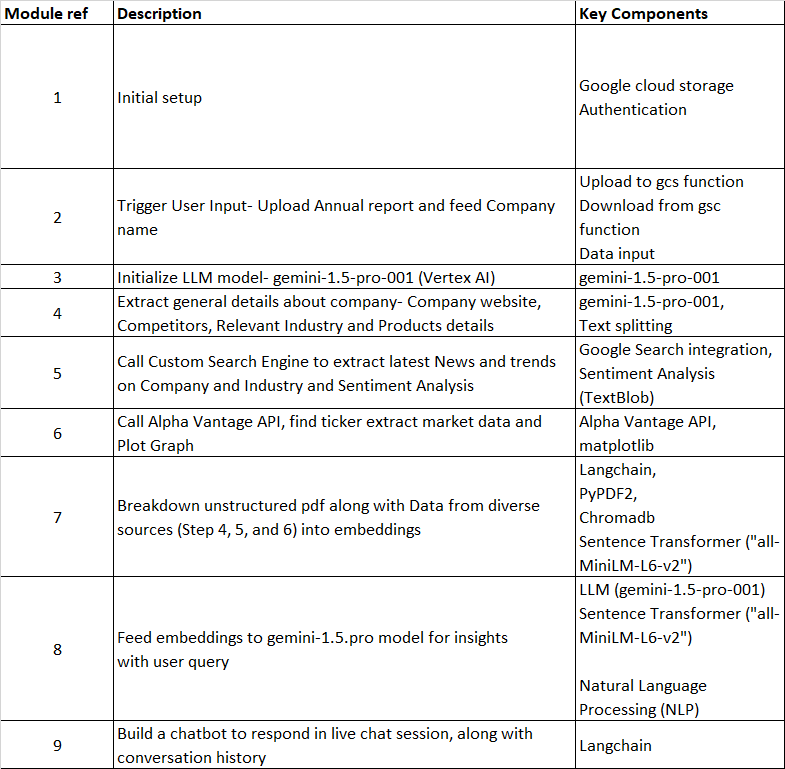


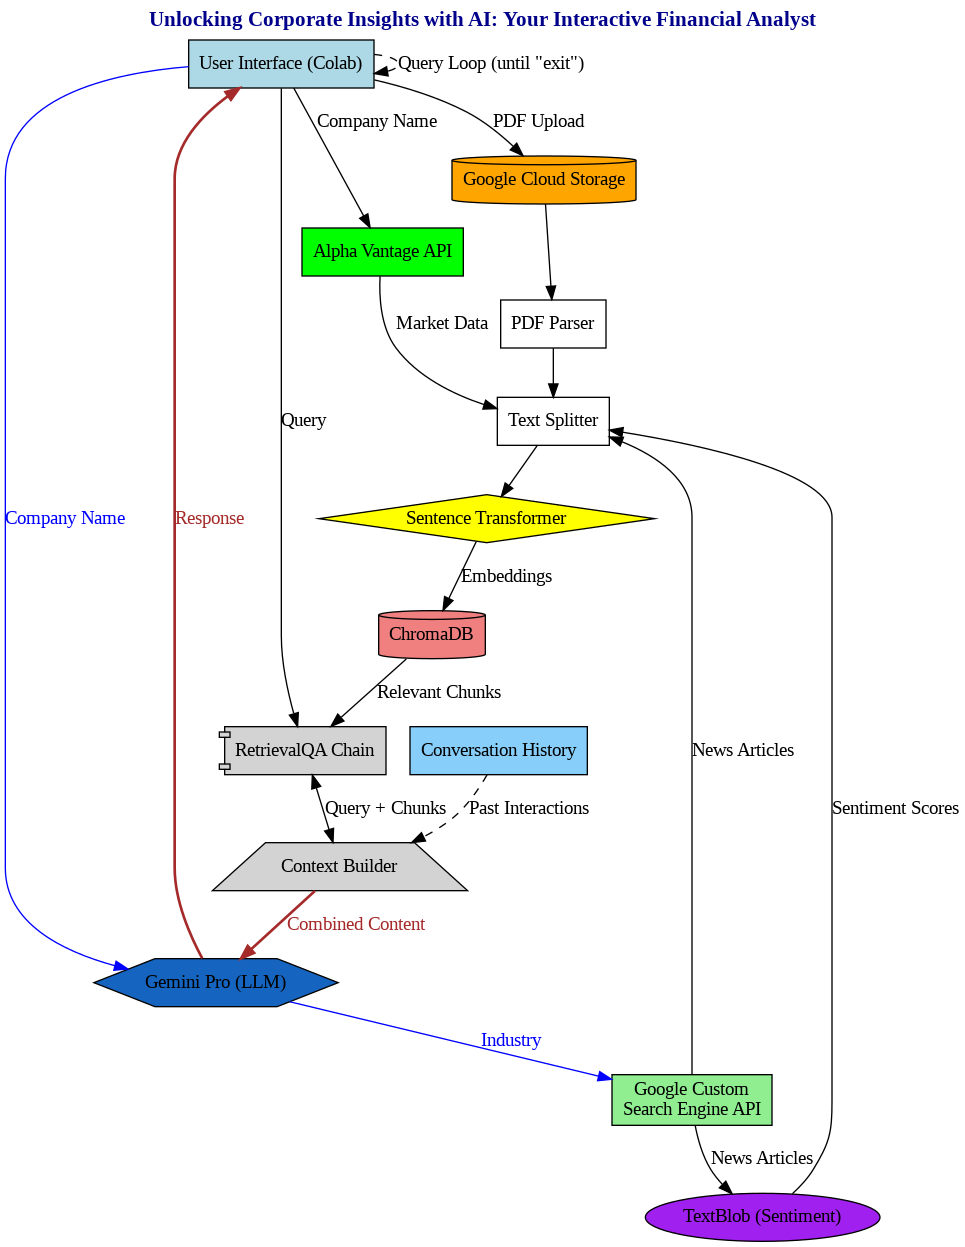


# Libraries:

1. Google Cloud:
        google-cloud-storage: For interacting with Google Cloud Storage.
2. Vertex AI:
        vertexai: The core library for accessing Vertex AI services.
        vertexai.preview.generative_models: Specific tools for working with generative AI models.
        vertexai.preview.language_models: Tools for text generation models.
3. Language Processing & Embeddings:
        langchain: Framework for building LLM applications.
        langchain-community: Additional components for LangChain.
        langchain-google-genai: Integration for Google's generative AI.
        sentence-transformers: Creating sentence embeddings.
        HuggingFaceEmbeddings: Integrating Hugging Face models into LangChain.
        
4. Data Storage:
        chromadb: Vector database for storing and searching embeddings.
5. PDF Processing:
        PyPDF2: For loading and extracting text from PDF files.
6. Google APIs:
        google-api-python-client: Client library for interacting with Google APIs.
7. Financial Data:
        alpha_vantage: API for accessing financial market data.
8. Sentiment Analysis:
        textblob: Library for performing sentiment analysis.
9. Other:
        smart_open: For working with various file-like objects.
        tiktoken: BPE tokenizer often used with OpenAI models.

# Tools:

1. Google Colab: The development environment where you're running the code.
2. Vertex AI Workbench: (Implicitly used) For managing and deploying models.
3. Google Cloud Storage: For storing input files and model data.
4. Hugging Face Hub: Repository of pre-trained models.

# APIs:

1. Google Custom Search Engine API: For fetching news and trends.
2. Alpha Vantage API: For fetching financial market data and news sentiment.

# Google Cloud Elements:

1. Vertex AI: The platform for building, deploying, and managing machine learning models.
2. Generative AI models: Gemini Pro is used for text generation and understanding.
3. Google Cloud Storage: Cloud-based storage for your data.
4. Authentication: Colab's authentication mechanism is used to access your Google Cloud resources securely.

# Module 1
# Step 1: Initializing Your Google Cloud Environment

This section sets up the foundation for your project:

**Install Google Cloud Storage Library:**

    !pip install google-cloud-storage



This command uses pip, the Python package installer, to download and install the google-cloud-storage library. This library provides the tools to interact with Google Cloud Storage (GCS), where you'll store and retrieve data.

**Import Necessary Modules:**

    from google.cloud import storage
    import os


  1. `from google.cloud import storage`: This line imports the core storage module from the library, giving you the classes and functions needed to work with GCS buckets and objects.
  2. `import os`: This imports Python's built-in os module, which provides ways to interact with your operating system, such as accessing environment variables (which we'll use later for credentials).


---


**Why This Matters:**

  1. **Google Cloud Storage:** Think of GCS as your project's secure, scalable file storage system in the cloud. You'll use it to store financial statements, extracted data, and other project files.
  2. **Libraries:** These Python libraries act as your toolkit. They handle the complexities of interacting with Google Cloud services, so you can focus on building your application's logic.
  3. **os Module:** This will be used to securely access your Google Cloud credentials from environment variables.


# Module 1
# Step 2: Authenticating to Google Cloud

This code handles the secure login process:

**Import Authentication Module:**
   
    from google.colab import auth


This line imports the auth module from the google.colab library. This module provides functions specifically designed for authenticating to Google Cloud services within a Colab environment.

**Authenticate User:**

    auth.authenticate_user()


This function initiates the authentication process.  Typically, it will:
1.	Open a browser window:

2.	You'll be prompted to sign in with your Google account.

3.	Request Permissions: You might need to grant Colab access to your Google Cloud resources.

4.	Generate Credentials: Once authenticated, the function will generate temporary credentials that Colab can use to access your Google Cloud project.


# Module 2
# Get User Input & Handle File Uploads

This section handles user input and cloud storage interaction:

**Prerequisite**

1.   In Google Cloud Console, create a new project and link a billing account to it.
2.   Navigate to the Cloud Storage section and click "Create Bucket".
3. Choose a unique bucket name, select a storage class and location, and click "Create".First, create a Vertex AI account and a project within the account. Then, enable billing for the project and create a storage bucket with input folders.




**Define Helper Functions:**

  `upload_file_to_gcs(file_path, bucket_name, destination_blob_name)`:
1.	Takes a local file path, the GCS bucket name, and the desired name for the file in GCS.  
2.	Uploads the file to the specified bucket using the Google Cloud Storage client.
3. Returns the full GCS path (e.g., gs://your-bucket/your-file.pdf)

  
`get_pdf_temp_url(bucket_name, object_name)`:


1. Downloads a PDF from GCS to memory.
2. Creates a temporary local file and writes the PDF data to it.
3. Return a URL-like string that LangChain (or other libraries) can use to easily read the PDF.

  


**Prompt User for Input:**
`prompt_user_for_input()`:
1.	Prints instructions for the user.
2.	Gets two inputs from the user: the annual statement file path (`annual_statement_i`) and the company name (`company_name_i`).
3.	Returns both values.

**Upload & Process Input:**
  Sets the GCS bucket (`corp_spec`) and folder (`input_documents`).
  
  Calls `prompt_user_for_input()` to get the file path and company name.
  
  Calls `upload_file_to_gcs()` to upload the annual statement to the GCS bucket, preserving the original file extension.
  
  Stores the company name and the GCS path of the uploaded file in variables.
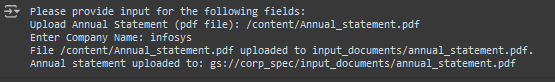


---


**Key Points:**

  GCS Path: Note that the annual_statement_path_i variable now holds the full Google Cloud Storage path to the uploaded file. This will be essential for accessing it later.
  
  PyPDF2: This library enables the code to extract text from PDF files, a crucial step in financial analysis.
  
  Temporary URLs: The get_pdf_temp_url function is a clever workaround to provide PDF data to libraries that typically expect local file paths.
  
  User Input: The code actively interacts with the user, making it a more dynamic and interactive experience.

# Module 3
# Initialize the Gemini Pro Model

This part gets your powerful AI model ready for action:

**Import Libraries:**
vertexai: The main library for interacting with Vertex AI services.

generative_models: Specific tools for working with generative AI models like Gemini Pro.

Other libraries for handling JSON, base64 encoding, and displaying outputs.

    import base64
    import vertexai
    import json
    from vertexai.generative_models import GenerativeModel, Part, FinishReason
    import vertexai.preview.generative_models as generative_models
    from vertexai.preview.language_models import TextGenerationModel

**Set Project and Location:**
`PROJECT_ID`: Your unique Google Cloud project identifier.

`LOCATION`: The region where you want your AI resources to be located (e.g., "us-central1").

**Initialize Vertex AI:**
`vertexai.init(project=PROJECT_ID, location=LOCATION)`: This crucial line establishes the connection between your code and your Google Cloud project.

**Select the Gemini Pro Model:**
`MODEL_ID = "gemini-1.5-pro-001"`: This specifies the exact model you want to use (Gemini Pro 1.5 in this case).

`model = GenerativeModel(MODEL_ID)`: This creates an instance of the model object, which you'll use to interact with the AI.

**Configure Generation Settings:**
`generation_config`: A dictionary containing parameters to control how the model generates responses.

`max_output_tokens`: Limits the length of the model's output.

`temperature`: Adjusts the "creativity" of the model (higher values mean more creative/less predictable).

`top_p`: Another way to control the output variety (related to sampling techniques).

**Set Safety Settings:**
`safety_settings`: This dictionary defines how strictly the model should avoid generating harmful content. You're setting thresholds for various categories of harm (hate speech, dangerous content, etc.) to `"BLOCK_MEDIUM_AND_ABOVE."` This is a responsible approach to ensure the model doesn't produce undesirable output.


# Module 4
# Extract Company Details

This part uses the Gemini Pro model to gather information about the company:

**Craft the Prompt:**
    
    prompt = f"for this company: {company_name}, generate following fields...":

This creates a clear instruction for the model, asking it to provide details like the company website, industry, competitors, and products.
Notice how we embed the company_name variable directly into the prompt, making it dynamic.

**Define the generate Function:**

    def generate(prompt):
        vertexai.init(project="trans-density-429404-a6", location="us-central1")
        model = GenerativeModel(
        "gemini-1.5-pro-001",
        system_instruction=["""you have a company name as input, generate only the data asked in prompt in this format-
        field x: generated data relevant to field x
        ; field y: generated data relevant to field y"""]
    )

This function encapsulates the interaction with the Gemini Pro model.


**Generate the Response:**

    responses = model.generate_content(
        [prompt],
        generation_config=generation_config,
        safety_settings=safety_settings,
        stream=True,
    )

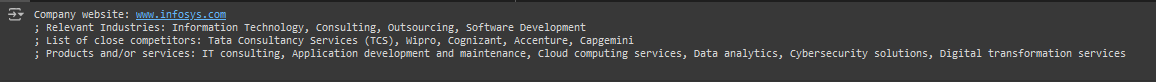
**Process the Response:**

`saved_response_prep.split(';')`- Splits the response text into fields using the semicolon delimiter (;).

Initializes variables to store extracted information.
Iterates over fields:
Splits each field into a key (field name) and value.
Checks if the key matches one of the desired fields and, if so, stores the value in the appropriate variable.

Loops through the variable names and prints the extracted information in a readable format.


# Module 5
# Get Industry News & Trends and Calculate Market Sentiment

This part fetches relevant information from the web using Google's search capabilities:

**Prerequisite:**
1. To create API- Enable Custom Search API in Google Cloud Console or generate through https://developers.google.com/custom-search/v1/overview#monitoring
2. To create Search Engine ID- https://programmablesearchengine.google.com/controlpanel/all

**Install the API Client:**

    !pip install google-api-python-client
    # Import necessary libraries
    from googleapiclient.discovery import build


This installs the necessary library for interacting with Google APIs.

**Import and Set Up:**

Import the build function to create service objects for interacting with APIs.

    # Define your API key and Search Engine ID

    from google.colab import userdata
    api_key = userdata.get('APIkeyCSE')
    cse_id = userdata.get('CSEid')

Get your API key (api_key) from Vertex AI platform and Custom Search Engine ID (cse_id) from https://programmablesearchengine.google.com/controlpanel/all.

**Define google_search Function:**

This function takes a search query, your credentials, and optional parameters (**kwargs).
It builds a customsearch service object using the build function and your api_key.
        Calls the service.cse().list() method to perform the search, providing your cse_id and the query.
        Returns the search results.

    # Function to perform Google search on Industry and trends

    def google_search(query, api_key, cse_id, **kwargs):
      service = build("customsearch", "v1", developerKey=api_key)
      res = service.cse().list(q=query, cx=cse_id, **kwargs).execute()
      return res




**Construct the Query and Execute the search:**

    query_ind = f"""Industry report and trends for: {relevant_industry}"""


This dynamically inserts the relevant_industry extracted in the previous step to create a targeted search query.

    results_ind = google_search(query_ind, api_key, cse_id)

This calls the google_search function to perform the search and stores the results.

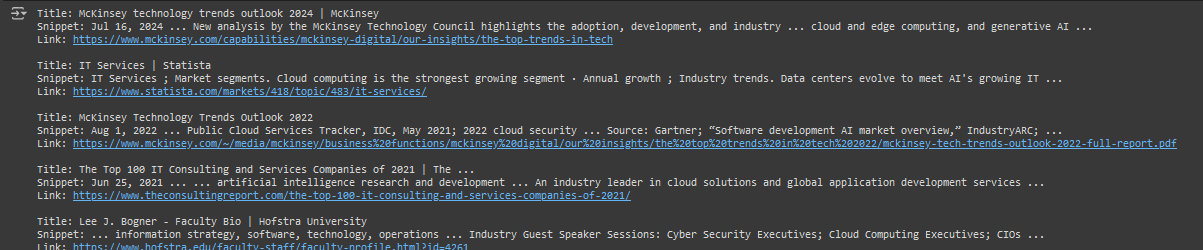

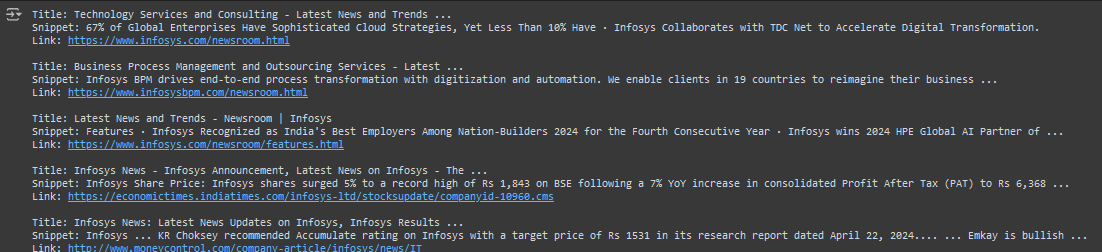

**Extract, Store and Display News Data:**

The code extracts specific pieces of information (titles, snippets) from the raw search results, which can be further processed or used as context for later analysis.

Creates lists to store all news titles (industry_title) and all news snippets (industry_snippet) seaparately in `industry_title` and `industry_snippet` respectively.



**Analyze Sentiment (with TextBlob):**


Imports TextBlob for sentiment analysis.
    # Sentiment analysis
    from textblob import TextBlob

Initializes TextBlob objects for each news title and calculate sentiment polarity scores (ranging from -1 to 1) and Calculate average sentiment.

    for item in results_ind.get('items', []):
    analysis = TextBlob(item['snippet'])
    sentiment_scores.append(analysis.sentiment.polarity)  # -1 (negative) to 1 (positive)
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    print("Average News Sentiment:", average_sentiment)

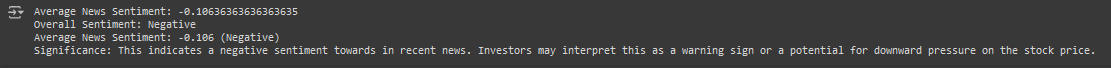

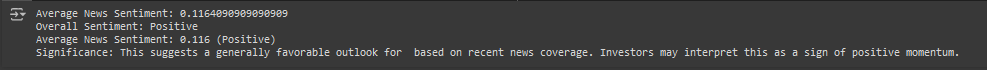


In a similar way, We can find relevant news and trends about company, its competitors or market to expand the scope of code functionality.

# Module 6
# Get Market Data

This section utilizes the Alpha Vantage API to retrieve financial information and news sentiment for the given company:

**Prerequisite:**
1. Generate API key- https://www.alphavantage.co/support/#api-key
2. Alpha Vantage documentation- https://www.alphavantage.co/documentation/

**Install the Library:**

    !pip install alpha_vantage


This installs the alpha_vantage library to interact with their financial data API.

**Import and Set API Key:**
        Import the TimeSeries class from the library.
        Provide your Alpha Vantage API key (api_key).

    from alpha_vantage.timeseries import TimeSeries
    # api_key for Alpha Vantage API key
    api_key = 'APIkeyAV'
**Define find_ticker Function:**
        Takes the company_name as input, and uses the get_symbol_search method to query Alpha Vantage for potential ticker symbols associated with the company.

 (ticker symbol- a unique grouping of letters that identifies a specific company, e.g. AAPL for Apple)

    def find_ticker(company_name):
        ts = TimeSeries(key=api_key)
        data, meta_data = ts.get_symbol_search(company_name)
        if not data.empty:  # Check if the DataFrame is empty
            return data.iloc[0]['1. symbol'] # Access the first row and '1. symbol' column
        else:
            return "Ticker not found."
  
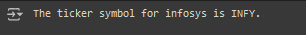

**Fetch Company Overview through Alpha Vantage:**
        Constructs a URL for fetching company overview data using the ticker found in the previous step.
    
    overview_data = requests.get(
      f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={api_key}"
      ).json()

**Time series Intraday data plotting:**

Importing libraries

    import matplotlib.pyplot as plt
    import pandas as pd
    import matplotlib.dates as mdates


Data extraction and transformation

    time_series_data = data['Time Series (5min)']
    df = pd.DataFrame.from_dict(time_series_data, orient='index')
    df = df.astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()


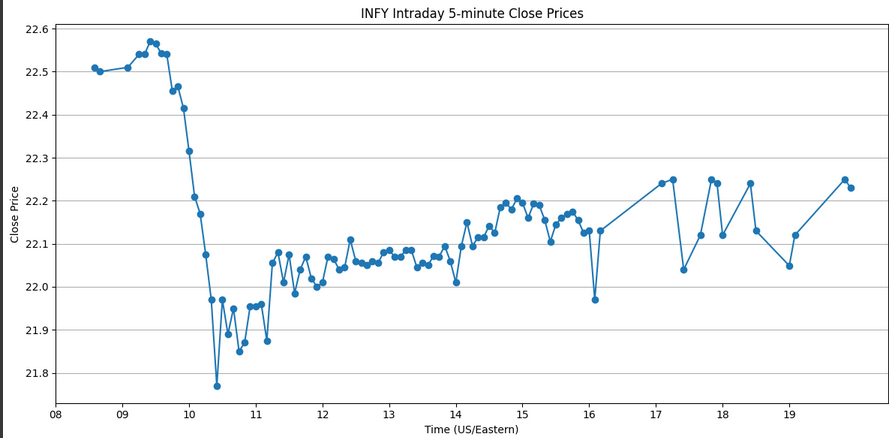

To explore market details about a company, follow instructions in https://www.alphavantage.co/documentation/

# Module 7
# Step 1: Install Libraries and Packages to Process PDF file

This step is where we transform the unstructured text of the annual statement into a format that our AI can understand and analyze effectively. Here's the detailed breakdown:

**Install Required Libraries:**
These commands install a suite of libraries essential for text processing, embedding generation, and working with the Gemini models:


    !pip install langchain    # langchain: A framework for building applications powered by language models.
    !pip install langchain-community    # langchain-community: Additional components for LangChain.
    !pip install pypdf    # pypdf: A library for parsing PDF files.
    !pip install --upgrade chromadb    # chromadb: A vector database for efficient storage and retrieval of embeddings.
    !pip install tiktoken    # tiktoken: A fast BPE tokenizer often used with OpenAI models.
    !pip install sentence-transformers    # sentence-transformers: Library for generating high-quality sentence embeddings.
    !pip install google.generativeai    # google.generativeai: Official Google library for working with their generative AI models.
    !pip install langchain-google-genai    # langchain-google-genai: Integration of Google's generative AI capabilities into LangChain.


**Import Necessary Modules:**


    import chromadb
    import numpy as np
    # ...(other imports related to langchain, sentence-transformers, chromadb, etc.)


**Set Environment Variable for Google API Key:**

    os.environ["GOOGLE_API_KEY"] = userdata.get('gcloudAPIKey')


This retrieves your Google Cloud API key (which you presumably stored in Colab's userdata) and sets it as an environment variable. This allows the libraries to automatically authenticate and access Google Cloud services.

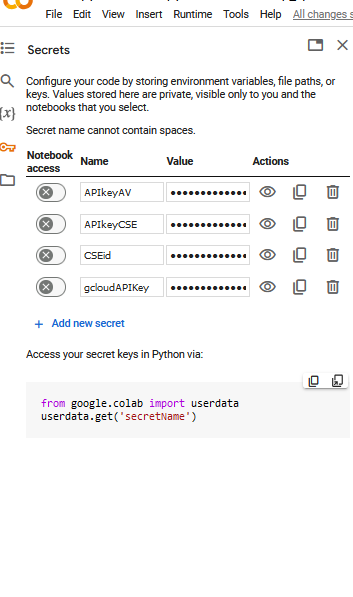

**Explanation of Key Concepts:**

Embeddings: Embeddings are numerical representations of text that capture semantic meaning. They allow us to measure similarity between pieces of text, which is crucial for tasks like question answering and information retrieval.

ChromaDB: A specialized database designed to store and efficiently search through these embeddings.

Sentence Transformers: A library that provides pre-trained models to generate high-quality sentence embeddings.

LangChain: A powerful framework that simplifies the process of building applications that interact with language models. It provides tools for chaining together different components (like document loaders, text splitters, embedding models, and language models) to create complex workflows.

Google Generative AI: Libraries that connect LangChain to Google's suite of generative models, allowing you to harness their capabilities.

# Module 7
# Step 2: Process PDF file & Create Embeddings

This part gets your PDF data ready for the AI to understand. Let us explore the PDF file processig step by step-

 **Load the PDF:**
        `pdf_loader = PyPDFLoader(pdf_url)`: This loads the annual statement PDF using the previously generated temporary URL.
        `documents = pdf_loader.load()`: Extracts text content from the PDF pages into a list of Document objects.

 **Add context from Module 4,5,6:**
    
    add_context = f"Relevant industry is {relevant_industry}, \n Industry news sentiment is {sentiment}, \n company offerings are {products}, \n industry news snippets are {industry_snippet},\n Intraday company data is {data}"

    all_text += add_context  
       
  **Split the Text:**
        `text_splitter.split_text(all_text)`: Creates a text splitter that breaks the document into smaller chunks based on a maximum character count.
        Initializes an empty texts list to store the chunks.
        Iterates over each document (page) and Splits the page content into chunks using the text splitter and adds them to the texts list.

  **Initialize Sentence Transformer Model:**
        `model_batch = SentenceTransformer('all-MiniLM-L6-v2')`: Loads a pre-trained sentence embedding model called `"all-MiniLM-L6-v2."` This model will be used to convert text chunks into numerical vector representations (embeddings).

   **Process Text in Batches:**
        `batch_size = 100`: Sets the number of text chunks to process in each batch.
        Initializes an empty embeddings list to store the generated embeddings.
        Iterates over the texts in batches:
            Encodes each batch using the `model_batch.encode` function, which returns a numpy array of embeddings.
            Appends these embeddings to the embeddings list.

   **Concatenate Embeddings:**
        `embeddings_np = np.concatenate(embeddings, axis=0)`: Combines all the embeddings from different batches into a single numpy array (embeddings_np).

  **Initialize Chroma Client:**
        `client1 = chromadb.Client()`: Creates a client to interact with the Chroma database.

   **Create or Connect to Chroma Collection:**
        `collection = client1.create_collection("my_collection")`: Either creates a new collection called "my_collection" in ChromaDB or connects to an existing one with that name.

   **Add Embeddings to the Collection:**
        `collection.add(...)`: Adds the text chunks (texts) and their corresponding embeddings (embeddings_np) to the ChromaDB collection. Each chunk gets a unique ID.

  **Get and Print Sample Documents:**
        `sample_docs = collection.get(limit=5)`: Retrieves 5 random documents from the collection.
      
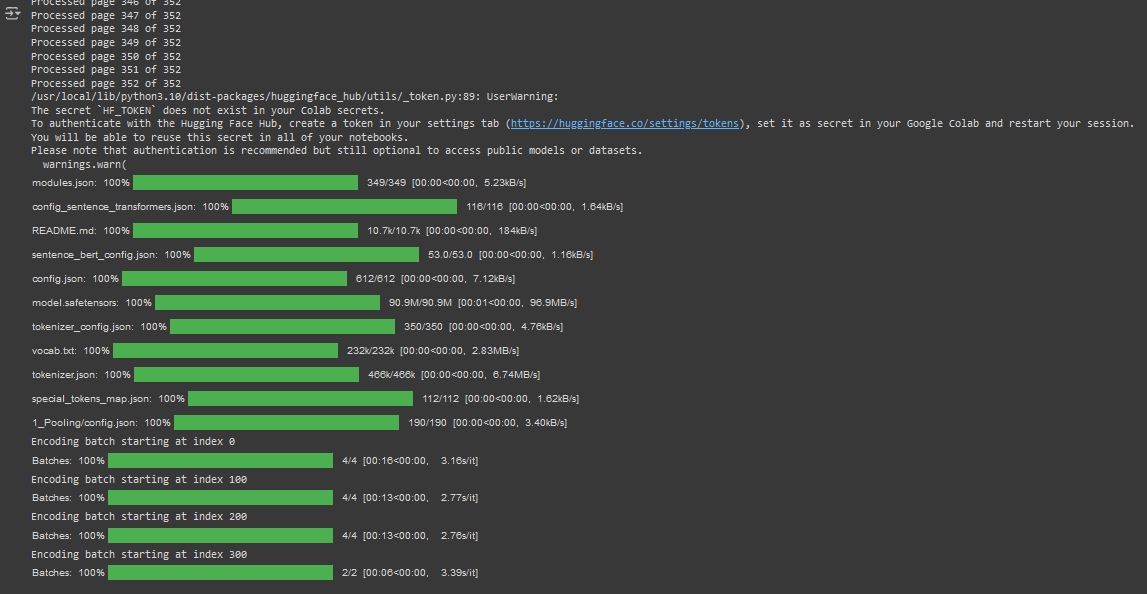


**Get and Print Sample Documents:**

`sample_docs = collection.get(limit=5):` Retrieves 5 random documents from the collection.

---


**Key Takeaways:**

  Text Splitting: Breaking the PDF into manageable chunks is essential for efficient processing and embedding generation.
  
  Sentence Embeddings: These numerical representations capture the semantic meaning of each text chunk, allowing the model to understand relationships between different pieces of information.

  ChromaDB: A powerful tool for storing and searching through embeddings. Think of it as a way to organize and index your information, making it easily accessible later.

  Batch Processing: Processing embeddings in batches helps manage memory usage and can be faster than encoding each chunk individually.

# Module 8

# Step 1: Prepare Embeddings for Gemini Pro

This short but crucial step bridges the gap between your text embeddings and the language model:

    !pip install langchain huggingface_hub transformers


  `huggingface_hub`: This library gives you access to a vast repository of pre-trained machine learning models hosted on the Hugging Face Hub. This includes the sentence embedding model you'll be using here.
  
  `transformers`: This library provides the tools to load and use those models in your code.

**Import and Load Hugging Face Embeddings:**

    from langchain.embeddings import HuggingFaceEmbeddings
    model_embed = "sentence-transformers/all-MiniLM-L6-v2"  
    embeddings1 = HuggingFaceEmbeddings(model_name=model_embed)


  `HuggingFaceEmbeddings`: This class from LangChain is specifically designed to work with embedding models from the Hugging Face Hub.

  `model_embed`: Specifies the name of the embedding model you want to use. In this case, you're using the same `"all-MiniLM-L6-v2"` model that you used earlier to generate the embeddings.

 `embeddings1 = HuggingFaceEmbeddings(model_name=model_embed)`: This line creates an instance of the HuggingFaceEmbeddings class, loading the specified model and making it ready for use.



---


**Key Points:**

 Standardization: By using the HuggingFaceEmbeddings class from LangChain, you're ensuring that your embeddings are in a format that LangChain can easily work with, regardless of the specific model you choose. This makes it easier to swap out embedding models if needed.

 Reusing Embeddings: You're creating a new embedding object (embeddings1) with the same model as before. This isn't for generating new embeddings, but rather for working with the existing ones in a way that's compatible with LangChain.

  Preparation for Gemini Pro: The ultimate goal is to use these embeddings as input to the Gemini Pro model. The HuggingFaceEmbeddings class helps you format and structure this input in a way that Gemini Pro can understand and utilize effectively.

# Module 8
# Step 2: Combine Context and Feed to LLM

This part is where the magic happens – we bring together the PDF embeddings, the company details, the news snippets, the financial data, and the sentiment analysis to create a rich context that our AI will use to answer questions:

  **Initialize the LLM:**
     `llm = ChatGoogleGenerativeAI(model=MODEL_ID, temperature=1)`:
            Creates an instance of the `ChatGoogleGenerativeAI` class, which is a specific type of language model designed for chat-like interactions.
            The `MODEL_ID` is the same Gemini Pro model you initialized earlier.
            The temperature parameter is set to 1, which encourages the model to be more creative and less predictable in its responses.

   **Create the Vectorstore:**
        `vectorstore = Chroma(...)`:
            This creates a vector store object linked to your ChromaDB collection.
            It uses the client1 (from Module 7) to connect to the existing collection.
            It also uses the embeddings1 object (from Module 8, Step 1) as the embedding function, ensuring consistency between how the embeddings were created and how they're used here.

   **Define Retrieval Chain Creation Function:**
        `create_retrieval_chain(retriever, combine_docs_chain)`:
            This function creates a retrieval QA chain using the specified retriever and document combination chain.
            The `"stuff"` chain type is used, which simply combines retrieved documents into a single string to be passed to the LLM.

  **Create the Retrieval Chain:**
        `template = ...:` Defines a prompt template that instructs the LLM to focus on summarizing and analyzing the context to understand factors affecting company profitability.
        
        `prompt = PromptTemplate.from_template(template)`: Creates a PromptTemplate object from the template string.
        
        `combine_docs_chain = create_stuff_documents_chain(llm, prompt)`: Creates a chain to combine the retrieved documents using the LLM and the prompt template.
        
        `retrieval_chain = create_retrieval_chain(retriever, combine_docs_chain)`: Creates a retrieval QA chain using the created retriever and combine_docs_chain.

   **Invoke the Retrieval Chain:**
        `response=retrieval_chain.invoke({"query":"based on company profile, what should be the company strategy for new products and services?"})`:
            Calls the retrieval chain with a sample query.
            The chain retrieves relevant documents based on the query, combines them, and passes the combined context and the query to the LLM to generate a response.

   **Print the Result:**
        `print(response["result"])`: Prints the LLM's generated response to the query.

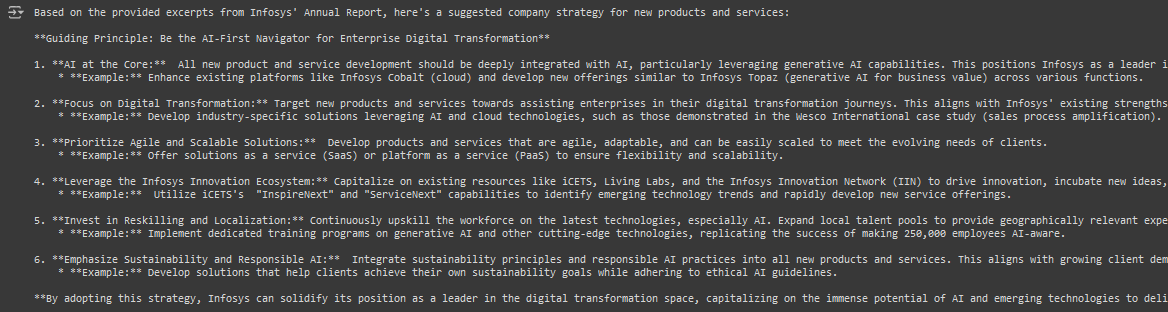

---


**Key Points:**

  
  LangChain: This framework simplifies the process of orchestrating complex interactions between different components (like vector stores, language models, and document processors).

  RetrievalQA: This type of chain is specifically designed for question-answering tasks, where relevant documents are retrieved and used as context for generating answers.

  Prompt Engineering: The prompt template guides the LLM's behavior, ensuring it focuses on the relevant aspects of the context and provides a comprehensive and insightful response.

# Module 9
# Interactive Chatbot

This section brings it all together, allowing you to converse with your data:

  **Conversation History:**
  
      conversation_history = []:
            
An empty list is initialized to store the history of the conversation. Each turn (user query and bot response) will be appended to this list as a dictionary.

   **prompt_chatbot_query Function:**

This function defines the main interaction loop of the chatbot:

  `Infinite Loop (while True)`: Keeps the conversation going until the user types "exit".

 Get User Input:
  `user_input = input("Enter query: ")`: Prompts the user to type a query and stores the input in the user_input variable.

Check for Exit Condition:
                `if user_input.lower() == "exit"`: break: Exits the loop if the user enters "exit".

 Append User Query to History:
                `conversation_history.append({"query": user_input})`: Adds the user's query to the conversation_history list.

Build Context:
                `history_str = ...`: Constructs a string representation of the conversation history, formatting each turn as `"User: query\nBot: result"`.
                `context = ...`: Combines the history string with the current query to create the full context for the LLM.

 Invoke Retrieval Chain:
                `response = retrieval_chain.invoke(...)`: Sends the updated context and user query to the retrieval chain.
                The chain fetches relevant documents, combines them, and passes them along with the query to the LLM to generate a response.

  Append Response to History:
                `conversation_history[-1]["result"] = response["result"]`: Adds the LLM's generated response to the latest turn in the conversation history.

  Print Response:
                `print(response["result"])`: Displays the LLM's response to the user.

**Start the Chatbot:**
       

`prompt_chatbot_query()`: Calls the function to initiate the chatbot interaction.

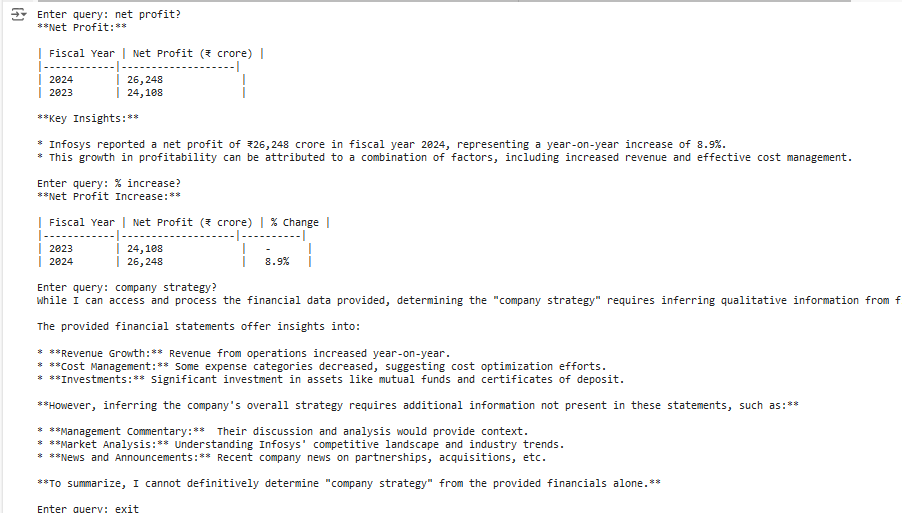

---


**Key Points:**

 Contextual Conversation: The chatbot maintains context by keeping track of the conversation history. This allows it to understand follow-up questions and provide more relevant responses.

  RetrievalQA: The retrieval chain is used again here, but this time with the additional context of the conversation history.

 User Interaction: The code allows for continuous interaction until the user explicitly chooses to exit.



# **Congratulations!**

You've successfully built an interactive chatbot that can analyze financial documents, retrieve relevant information, and answer your questions. This tool can be incredibly valuable for financial analysts, investors, and anyone interested in quickly gaining insights from complex financial data.